# Setup Spark environment 

In [1]:
import time
import os

Start=time.time()
# Download and install tools 

# Install Java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Download and Install Spark
!wget  -q http://apache.osuosl.org/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz

# Install findspark
!pip install -q findspark

# Set environment variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"
import findspark
findspark.init()

print(f"\nIt took {(time.time()-Start)} seconds to install all dependencies for spark to run on Google Colab. \n")



It took 78.12679481506348 seconds to install all dependencies for spark to run on Google Colab. 



-----------------------------

# All files present in the data/mllib folder



- Spark ships with a good number of test data sets that can be used for all kinds of training and testing.

- This data can be explored by browsing to the installation path of Spark and checking out the folder marked `data`. 

In [2]:
from pathlib import Path
from IPython.display import HTML

PATH = "/content/spark-2.4.7-bin-hadoop2.7/data/mllib"

files = [str(x).replace(PATH + "/", "") for x in Path(PATH).glob("**/*") if x.is_file()]
files.sort()
folders = [
    f"<font color='rgba(0, 0, 0, 87)' size='1'>{'/'.join(f.split('/')[:-1])}/</font>"  # folder part
    f"{f.split('/')[-1]}"  # file part
    for f in files
    if "/" in f
]
files = folders + [f for f in files if "/" not in f]

HTML(
    f"<font face='courier' size='2'>"
    f"<strong>All files present in the data/mllib folder:</strong><br />"
    f"{''.join([f'<li>{str(f)}</li>' for f in files])}"
    f"</font>"
)



In [3]:
# explore the content of the samples 
folder="/content/spark-2.4.7-bin-hadoop2.7/data/mllib"
file='iris_libsvm.txt'
file=folder+'/'+file
!head -n 10 $file



0.0 1:5.1 2:3.5 3:1.4 4:0.2
0.0 1:4.9 2:3.0 3:1.4 4:0.2
0.0 1:4.7 2:3.2 3:1.3 4:0.2
0.0 1:4.6 2:3.1 3:1.5 4:0.2
0.0 1:5.0 2:3.6 3:1.4 4:0.2
0.0 1:5.4 2:3.9 3:1.7 4:0.4
0.0 1:4.6 2:3.4 3:1.4 4:0.3
0.0 1:5.0 2:3.4 3:1.5 4:0.2
0.0 1:4.4 2:2.9 3:1.4 4:0.2
0.0 1:4.9 2:3.1 3:1.5 4:0.1


--------------------------

# Loading Image data into PySpark

In [4]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

Example of loading image data using the `kittens` dataset that ships with Spark

Refer to ML Main Guide for more info: https://spark.apache.org/docs/latest/ml-datasource#image-data-source

The schema of the image column is:
- origin: StringType (represents the file path of the image)
- height: IntegerType (height of the image)
- width: IntegerType (width of the image)
- nChannels: IntegerType (number of image channels)
- mode: IntegerType (OpenCV-compatible type)
- data: BinaryType (Image bytes in OpenCV-compatible order: row-wise BGR in most cases)

In [5]:
!ls "/content/spark-2.4.7-bin-hadoop2.7/data/mllib/images/origin/kittens"

29.5.a_b_EGDP022204.jpg  54893.jpg  DP153539.jpg  DP802813.jpg	not-image.txt


In [6]:
PATH = "/content/spark-2.4.7-bin-hadoop2.7/data/mllib/images/origin/kittens"
df = (
    spark.read.format("image")
    .option("dropInvalid", True)
    .load(PATH)
    .select("image.origin", "image.height", "image.width", "image.nChannels", "image.mode", "image.data")
)
df.toPandas()

,origin,height,width,nChannels,mode,data
0,file:///content/spark-2.4.7-bin-hadoop2.7/data...,311,300,3,16,"[193, 193, 193, 194, 194, 194, 194, 194, 194, ..."
1,file:///content/spark-2.4.7-bin-hadoop2.7/data...,313,199,3,16,"[208, 229, 237, 202, 223, 231, 210, 231, 239, ..."
2,file:///content/spark-2.4.7-bin-hadoop2.7/data...,200,300,3,16,"[88, 93, 96, 88, 93, 96, 88, 93, 96, 89, 94, 9..."
3,file:///content/spark-2.4.7-bin-hadoop2.7/data...,296,300,3,16,"[203, 230, 244, 202, 229, 243, 201, 228, 242, ..."


# LIBSVM Data 



libsvm package implements Spark SQL data source API for loading LIBSVM data as DataFrame. 

The loaded DataFrame has two columns: 
- `label` containing labels stored as doubles
- `features` containing feature vectors stored as Vectors

To use LIBSVM data source, you need to set "libsvm" as the format in DataFrameReader.

 **LIBSVM**  is a text format in which each line represents a labeled sparse feature vector using the following format:

> label index1:value1 index2:value2 ...

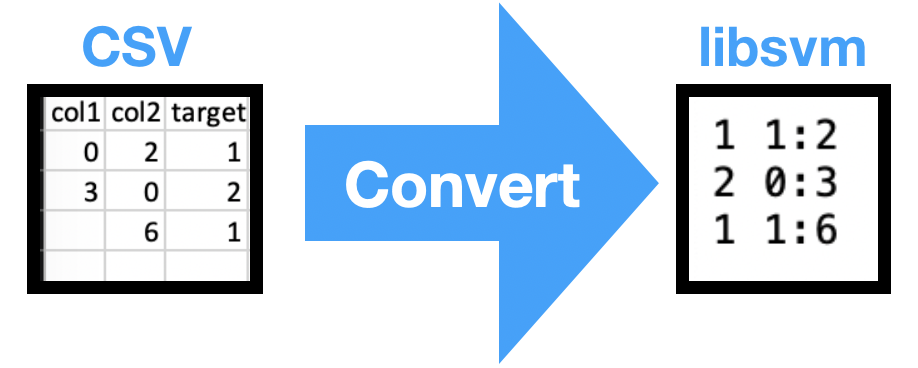

In [7]:
!head -n 3 /content/spark-2.4.7-bin-hadoop2.7/data/mllib/sample_libsvm_data.txt

0 128:51 129:159 130:253 131:159 132:50 155:48 156:238 157:252 158:252 159:252 160:237 182:54 183:227 184:253 185:252 186:239 187:233 188:252 189:57 190:6 208:10 209:60 210:224 211:252 212:253 213:252 214:202 215:84 216:252 217:253 218:122 236:163 237:252 238:252 239:252 240:253 241:252 242:252 243:96 244:189 245:253 246:167 263:51 264:238 265:253 266:253 267:190 268:114 269:253 270:228 271:47 272:79 273:255 274:168 290:48 291:238 292:252 293:252 294:179 295:12 296:75 297:121 298:21 301:253 302:243 303:50 317:38 318:165 319:253 320:233 321:208 322:84 329:253 330:252 331:165 344:7 345:178 346:252 347:240 348:71 349:19 350:28 357:253 358:252 359:195 372:57 373:252 374:252 375:63 385:253 386:252 387:195 400:198 401:253 402:190 413:255 414:253 415:196 427:76 428:246 429:252 430:112 441:253 442:252 443:148 455:85 456:252 457:230 458:25 467:7 468:135 469:253 470:186 471:12 483:85 484:252 485:223 494:7 495:131 496:252 497:225 498:71 511:85 512:252 513:145 521:48 522:165 523:252 524:173 539:86

In [8]:
PATH = "/content/spark-2.4.7-bin-hadoop2.7/data/mllib/sample_libsvm_data.txt"

df = spark.read.format("libsvm").option("numFeatures", "780").load(PATH)

LIBSVM data source supports the following options: 
- `numFeatures`: number of features. If unspecified or nonpositive, the number of features will be determined automatically at the cost of one additional pass. This is also useful when the dataset is already split into multiple files and you want to load them separately, because some features may not present in certain files, which leads to inconsistent feature dimensions. 


In [9]:
df.show(10, truncate=False)

+-----+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [10]:
df.select('features').show(1)

+--------------------+
|            features|
+--------------------+
|(780,[127,128,129...|
+--------------------+
only showing top 1 row

